In [122]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection  
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [149]:
df = pd.read_csv('Data/bank.csv')

## Data envelopment analysis

In [150]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [89]:
#Get unique value for each category
job = df["job"].unique()
marital = df["marital"].unique()
education = df["education"].unique()

In [90]:

df.loc[df['job'] == "technician"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
14,31,technician,single,tertiary,no,703,yes,no,unknown,8,may,943,2,-1,0,unknown,yes
26,31,technician,single,tertiary,no,22,yes,no,unknown,9,may,483,3,-1,0,unknown,yes
31,60,technician,married,primary,no,65,yes,no,unknown,9,may,1028,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11138,32,technician,married,secondary,no,235,yes,no,telephone,28,aug,688,6,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [91]:
# Données totales sans GroupBY
#valeur non nulles
#df['education'].count()

#count distinct values 
#df['education'].nunique()


#Repartition par niveaux d'études
repartEducation = {}
soldeEduc = {}
for i in education:
    frameEducation = df.loc[df['education'] == i]
    repartEducation[i] = df.loc[df['education'] == i]["age"].count()
#Valeur moyenne du solde bancaire par niveau d'études
    soldeEduc[i] = frameEducation.loc[frameEducation['education'] == i ]["balance"].mean()

    

#Repartition par emploi
repartEmploi = {}
soldeEmploi = {}
for i in job:
    frameEmploi = df.loc[df['job'] == i]
    repartEmploi[i] = df.loc[df['job'] == i]["age"].count()
#Valeur moyenne du solde bancaire par type d'emploi
    soldeEmploi[i] = frameEmploi.loc[frameEmploi['job'] == i ]["balance"].mean()





#Repartition par statut marital
repartMarital = {}
soldeMarital = {}
for i in marital:
    frameMarital = df.loc[df['marital'] == i]
    repartMarital[i] = df.loc[df['marital'] == i]["age"].count()
#Valeur moyenne du solde bancaire par type d'emploi
    soldeMarital[i] = frameMarital.loc[frameMarital['marital'] == i ]["balance"].mean()







In [92]:
# Avec groupBY

# Repartition par niveaux d'études
repartEducation = {i: len(df[df['education'] == i]) for i in education}
soldeEduc = {i: df.groupby('education')['balance'].mean()[i] for i in education}

# Repartition par emploi
repartEmploi = {i: len(df[df['job'] == i]) for i in job}
soldeEmploi = {i: df.groupby('job')['balance'].mean()[i] for i in job}

# Repartition par statut marital
repartMarital = {i: len(df[df['marital'] == i]) for i in marital}
soldeMarital = {i: df.groupby('marital')['balance'].mean()[i] for i in marital}


In [93]:
#Classement de toutes les catégories : 

sorted_marital = dict(sorted(soldeMarital.items(), key=lambda item:item[1],reverse=True))
sorted_emploi = dict(sorted(soldeEmploi.items(), key=lambda item:item[1],reverse=True))
sorted_education = dict(sorted(soldeEduc.items(), key=lambda item:item[1],reverse=True))

In [109]:
#Quels sont les meilleurs type de graphe pour afficher des repartions de données ?
sorted_education

{'tertiary': 1845.8690702087285,
 'unknown': 1746.605633802817,
 'primary': 1523.0313333333334,
 'secondary': 1296.4802775748722}

In [105]:

fig = px.pie(values = repartEmploi.values(),
             names = repartEmploi.keys())

fig.show()

<BarContainer object of 4 artists>

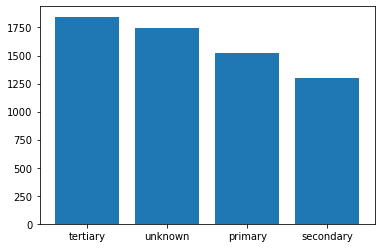

In [111]:
fig, ax = plt.subplots()
ax.bar(x = list(sorted_education.keys()), height = list(sorted_education.values()))

## Prédiction sur la propriété Housing

### Classification binaire : régression logistique

In [143]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,0,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes


In [216]:
dfTransform = pd.read_csv('Data/bank.csv')

# Factoriser les colonnes avec pd.Categorical()
dfTransform['job'] = pd.Categorical(dfTransform['job'])
dfTransform['marital'] = pd.Categorical(dfTransform['marital'], categories=['married', 'single', 'divorced'])
dfTransform['education'] = pd.Categorical(dfTransform['education'], categories=['primary', 'secondary', 'tertiary', 'unknown'])

#Extraire les entiers uniques correspondant à chaque valeur
entiersJob = dfTransform['job'].cat.codes
entiersMarital = dfTransform['marital'].cat.codes
entiersEducation = dfTransform['education'].cat.codes

#Dictionnaires de correspondance
correspondanceJob = dict(zip(dfTransform['job'], entiersJob))
correspondanceMarital = dict(zip(dfTransform['marital'], entiersMarital))
correspondanceEducation = dict(zip(dfTransform['education'], entiersEducation))

#Correspondances
print("Correspondance pour la colonne 'job':")
print(correspondanceJob)
print("\nCorrespondance pour la colonne 'marital':")
print(correspondanceMarital)
print("\nCorrespondance pour la colonne 'education':")
print(correspondanceEducation)


Correspondance pour la colonne 'job':
{'admin.': 0, 'technician': 9, 'services': 7, 'management': 4, 'retired': 5, 'blue-collar': 1, 'unemployed': 10, 'entrepreneur': 2, 'housemaid': 3, 'unknown': 11, 'self-employed': 6, 'student': 8}

Correspondance pour la colonne 'marital':
{'married': 0, 'single': 1, 'divorced': 2}

Correspondance pour la colonne 'education':
{'secondary': 1, 'tertiary': 2, 'primary': 0, 'unknown': 3}


In [215]:
dfTransform = pd.read_csv('Data/bank.csv')

# Factoriser les colonnes avec pd.Categorical()
dfTransform['job'] = pd.Categorical(dfTransform['job'])
dfTransform['marital'] = pd.Categorical(dfTransform['marital'], categories=['married', 'single', 'divorced'])
dfTransform['education'] = pd.Categorical(dfTransform['education'], categories=['primary', 'secondary', 'tertiary', 'unknown'])

# Assigner les entiers correspondants aux colonnes
dfTransform['job'] = dfTransform['job'].cat.codes
dfTransform['marital'] = dfTransform['marital'].cat.codes
dfTransform['education'] = dfTransform['education'].cat.codes

# Créer des dictionnaires de correspondance
correspondanceJob = dict(zip(dfTransform['job'], dfTransform['job'].cat.categories))
correspondanceMarital = dict(zip(dfTransform['marital'], dfTransform['marital'].cat.categories))
correspondanceEducation = dict(zip(dfTransform['education'], dfTransform['education'].cat.categories))

# Afficher les correspondances
print("Correspondance pour la colonne 'job':")
print(correspondanceJob)
print("\nCorrespondance pour la colonne 'marital':")
print(correspondanceMarital)
print("\nCorrespondance pour la colonne 'education':")
print(correspondanceEducation)


AttributeError: Can only use .cat accessor with a 'category' dtype

In [224]:
# Lecture du fichier CSV
dfTransform = pd.read_csv('Data/bank.csv')

# Créer les catégories pour chaque colonne
categories_job = ['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
categories_marital = ['married', 'single', 'divorced']
categories_education = ['primary', 'secondary', 'tertiary', 'unknown']

# Factoriser les colonnes avec pd.factorize()
dfTransform['job'] = pd.Categorical(dfTransform['job'], categories=categories_job).codes
dfTransform['marital'] = pd.Categorical(dfTransform['marital'], categories=categories_marital).codes
dfTransform['education'] = pd.Categorical(dfTransform['education'], categories=categories_education).codes

# Créer des dictionnaires de correspondance
correspondanceJob = dict(zip(dfTransform['job'].unique(), categories_job))
correspondanceMarital = dict(zip(dfTransform['marital'].unique(), categories_marital))
correspondanceEducation = dict(zip(dfTransform['education'].unique(), categories_education))

# Afficher les correspondances
print("Correspondance pour la colonne 'job':")
print(correspondanceJob)
print("\nCorrespondance pour la colonne 'marital':")
print(correspondanceMarital)
print("\nCorrespondance pour la colonne 'education':")
print(correspondanceEducation)


Correspondance pour la colonne 'job':
{0: 'admin.', 1: 'technician', 2: 'services', 3: 'management', 4: 'retired', 5: 'blue-collar', 6: 'unemployed', 7: 'entrepreneur', 8: 'housemaid', 9: 'unknown', 10: 'self-employed', 11: 'student'}

Correspondance pour la colonne 'marital':
{0: 'married', 1: 'single', 2: 'divorced'}

Correspondance pour la colonne 'education':
{1: 'primary', 2: 'secondary', 0: 'tertiary', 3: 'unknown'}


In [225]:
dfTransform

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,0,1,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,0,0,1,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,1,0,1,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,2,0,1,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,0,0,2,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,5,1,0,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,2,0,1,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,1,1,1,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,1,0,1,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [226]:
#Valeurs caractéristiques et valeur cible
x = dfTransform[['job','marital','education','balance']]
y = dfTransform['housing']

In [227]:
#Fractionnement du dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [228]:
#Initialisation du modèle
modele_regLog = linear_model.LogisticRegression(random_state = 0, solver = 'liblinear', multi_class= 'auto') 

#Entrainement du modèle
modele_regLog.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [229]:
precision = modele_regLog.score(x_test,y_test)
print(precision*100)

55.06986743102831


In [244]:
print("Correspondance pour la colonne 'job':")
print(correspondanceJob)
print("\nCorrespondance pour la colonne 'marital':")
print(correspondanceMarital)
print("\nCorrespondance pour la colonne 'education':")
print(correspondanceEducation)
dfTransform.head(15)

#x = dfTransform[['job','marital','education','balance']]


Correspondance pour la colonne 'job':
{0: 'admin.', 1: 'technician', 2: 'services', 3: 'management', 4: 'retired', 5: 'blue-collar', 6: 'unemployed', 7: 'entrepreneur', 8: 'housemaid', 9: 'unknown', 10: 'self-employed', 11: 'student'}

Correspondance pour la colonne 'marital':
{0: 'married', 1: 'single', 2: 'divorced'}

Correspondance pour la colonne 'education':
{1: 'primary', 2: 'secondary', 0: 'tertiary', 3: 'unknown'}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,0,1,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,0,0,1,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,1,0,1,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,2,0,1,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,0,0,2,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,3,1,2,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,3,0,2,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,4,2,1,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,1,0,1,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,2,1,1,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [248]:
#Prédiction
prediction = modele_regLog.predict([[1,1,2,745]])
print(prediction[0])

no


/Users/yoannkablan/miniconda3/envs/worklab/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

